# Mathematique de l'ascenseur spatial

Nous allons d'abord charger les librairies Python de Mathematiques (numpy) et de représentation graphique (matplotlib)
Sans numpy nous n'aurions pas de fonction racine (sqrt); matplotlib fonctionne un peu comme la calculatrice 


In [73]:
import numpy as np
import matplotlib.pyplot as plt

Et ensuite definir les constantes utilisées:

In [83]:
G = 6.67408E-11    # Constante de gravitation universelle en m(3)*s(-2)*kg(-1)
M = 5.97242E24     # Masse de la terre en kg
RTerre = 6.371E6   # Rayon de la Terre en m, soit 6371 km      

### Force gravitationnelle et force centrifuge:
Nous allons tracer sur le même qraphique les deux forces, gravitationelle et centrifuge.   
Le rayon r prendra des valeurs entre 1 et 100 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


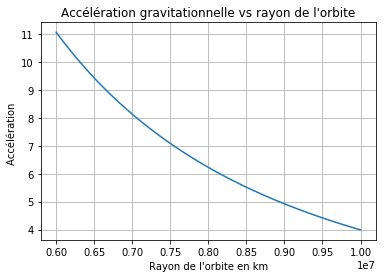

In [108]:
ForceGravitation =       (G*M)/(r**2)
VitesseAngulaire = np.sqrt((G*M)/(r**3))
'''
r = np.arange(50000, 300000, 1)

ForceCentrifuge  = np.sqrt((G*M)/(r**3))

plt.plot(r, ForceGravitation)

plt.xlabel("Rayon de l'orbite en km")
plt.ylabel("Accélération ")
plt.grid()
plt.title("Accélération gravitationnelle vs rayon de l'orbite")

plt.show()
'''
r = np.arange(6000000, 10000000, 1)

plt.plot(r, ForceGravitation)

plt.xlabel("Rayon de l'orbite en km")
plt.ylabel("Accélération ")
plt.grid()
plt.title("Accélération gravitationnelle vs rayon de l'orbite")

plt.show()
